In [49]:
# Imports

import math
import numpy as np
from matplotlib import pyplot as plt
from numpy import random as rnd
import warnings,datetime,os,calendar,csv,time

import tensorflow as tf
import pandas as pd
import seaborn as sns

from keras.models import Model,Sequential
from keras.layers import Dense,LSTM,Conv2D,Dropout,BatchNormalization,RepeatVector,TimeDistributed,Input,Concatenate,Add,Activation,MaxPooling2D,AveragePooling2D,Flatten
import keras.backend as K

from sklearn import preprocessing as pp

from sklearn.cluster import KMeans,MeanShift
from sklearn.dummy import DummyClassifier,DummyRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.linear_model import BayesianRidge,Lasso,LinearRegression,SGDClassifier,SGDRegressor
from sklearn.mixture import BayesianGaussianMixture,GaussianMixture
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor,RadiusNeighborsClassifier,RadiusNeighborsRegressor,NearestNeighbors
from sklearn.manifold import Isomap,TSNE
from sklearn.model_selection import KFold,StratifiedKFold,train_test_split
from sklearn.svm import LinearSVC,LinearSVR
from sklearn.neural_network import BernoulliRBM,MLPClassifier,MLPRegressor
from sklearn.decomposition import FactorAnalysis,KernelPCA,PCA,MiniBatchSparsePCA,FastICA
from sklearn.preprocessing import CategoricalEncoder,KBinsDiscretizer,LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler

from xgboost import XGBClassifier,XGBRegressor

import pickle,h5py,json

import pandas_datareader as pdr
import urllib
from bs4 import BeautifulSoup
import iexfinance as iex
from iexfinance.stocks import get_historical_data
from scipy.signal import resample,correlate
from scipy import fftpack

warnings.filterwarnings('ignore')
sns.set()
plt.xkcd()

In [21]:
df = pd.read_excel('..\\..\\TF_data\\BusinessMacroHistory\\data3\\retail_sales.xlsx')

df['Time'] = pd.to_datetime(df['Time'].apply(lambda x: '01.'+str(x)[-2:]+'.'+str(x)[:4]))
df = df.set_index('Time')

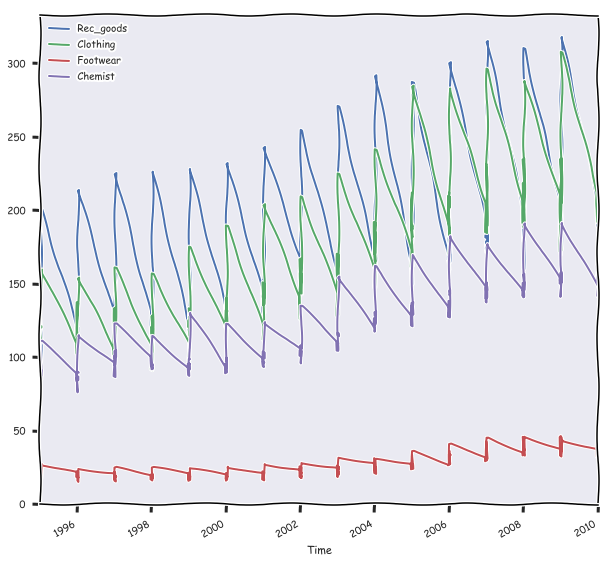

In [25]:
df.plot(figsize=(10,10))

In [27]:
def temporalize(X,lookback):
    XX = []
    for i in range(lookback,X.shape[1]):
        xx = X[:,i-lookback:i]
        XX.append(xx)
    XX = np.stack(XX,axis=0).reshape(-1,lookback,X.shape[0])
    return XX

In [41]:
X0 = temporalize(df.transpose().values.reshape(-1,df.shape[0]),lookback=10)

In [45]:
timesteps = X0.shape[1]
n_features = X0.shape[2]

In [50]:
model = Sequential()
model.add(LSTM(128,activation='relu',input_shape=(timesteps,n_features),return_sequences=True))
model.add(LSTM(64,activation='relu',return_sequences=False))
model.add(RepeatVector(timesteps))
model.add(LSTM(64,activation='relu',return_sequences=True))
model.add(LSTM(128,activation='relu',return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))
model.compile(optimizer='adam', loss='mse')

In [51]:
model.fit(X0,X0,epochs=100,batch_size=5)

Epoch 1/100
175/175 [==============================] - 5s 28ms/step - loss: 13737.6256
Epoch 2/100
175/175 [==============================] - 1s 6ms/step - loss: 9810.8992
Epoch 3/100
175/175 [==============================] - 1s 6ms/step - loss: 3236.1811
Epoch 4/100
175/175 [==============================] - 1s 7ms/step - loss: 1398.3340
Epoch 5/100
175/175 [==============================] - 1s 7ms/step - loss: 679.5647
Epoch 6/100
175/175 [==============================] - 1s 6ms/step - loss: 553.1766
Epoch 7/100
175/175 [==============================] - 1s 6ms/step - loss: 456.0168
Epoch 8/100
175/175 [==============================] - 1s 6ms/step - loss: 443.6367
Epoch 9/100
175/175 [==============================] - 1s 6ms/step - loss: 442.2306
Epoch 10/100
175/175 [==============================] - 1s 7ms/step - loss: 438.5737
Epoch 11/100
175/175 [==============================] - 1s 6ms/step - loss: 437.4759
Epoch 12/100
175/175 [==============================] - 1s 6ms/step 

Epoch 96/100
175/175 [==============================] - 1s 8ms/step - loss: 519.1367
Epoch 97/100
175/175 [==============================] - 1s 8ms/step - loss: 1012.5144
Epoch 98/100
175/175 [==============================] - 1s 8ms/step - loss: 754.9109
Epoch 99/100
175/175 [==============================] - 1s 8ms/step - loss: 556.9521
Epoch 100/100
175/175 [==============================] - 1s 8ms/step - loss: 543.1212


In [60]:
Xp = model.predict(X0[0,:,:].reshape(-1,X0.shape[1],X0.shape[2]))

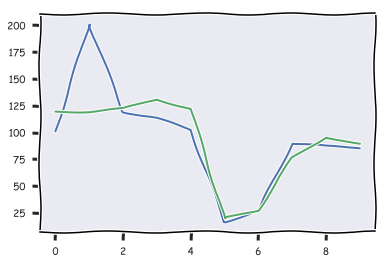

In [70]:
plt.plot(X0[0,:,3])
plt.plot(Xp[0,:,3])

In [68]:
Xp.shape

(1, 10, 4)

In [63]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 10, 128)           68096     
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                49408     
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 10, 64)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 10, 64)            33024     
_________________________________________________________________
lstm_10 (LSTM)               (None, 10, 128)           98816     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 10, 4)             516       
Total params: 249,860
Trainable params: 249,860
Non-trainable params: 0
_________________________________________________________________
